## **PROBLEM STATEMENT**

Naimatt Supermarket the leading retail store in Kenya want to Understanding shopping trends Of Consumers who
purchase Surface care & protection products with an
end goal of developing a Category Strategy that shall
guide the management in establishing the

below aspects.

1) Promotions strategy

2) Assortment strategy

3) Merchandising strategy

4) Sales growth strategy

5) Pricing strategy.

The main objectives are:

1) Assessing performance of the branch, Categories,
Brands and SKUs.

2) Basket Analysis:
➢ Determine what products have high frequency of
being purchased together (Correlation).
➢ Time of purchase.

3) Customer Transition and Churn Analysis.

4) RFM analysis( Customer Recency, Frequency and
Monetary Value Analysis).

5) Through your own market analysis, Share Insights
that complement your Shopper trends Report.

# DATA UNDERSTANDING

The dataset is a total Basket Composition of shoppers who purchased home care products

products between (January 2019- June 2019) in the given Naimatt Branches.
The dataset contain 12 variables in columns and 33000 transactions in rows.

**ITEM ID**.	Refers to the unique ID of a Particular Item/product/SKU purchased by a customer.

**RECEIPT ID**	Refers to the unique ID of the payment receipt for a particular customer.

** ITEM PRICE** 	Price of the particular SKU.

**QUANTITY PURCHASED**	Quantity Purchased of a particular SKU/product.

**TRANSACTION DATE**	Date the particular item was purchased.

**CUSTOMER ID**	Unique identifier of a particular customer.( Some may share a name, but cannot share a customer ID).

**NAIVAS BRANCH**	The branch that a particular transaction was made.
	
 **DEPARTMENT**	  Product Categorisation.

**CATEGORY**      Product Categorisation.
                    	
**FINELINE**     Product Categorisation.

**BRAND**	       Product Categorisation.

**ITEM DESCRIPTION**  Product Categorisation.



In [3]:
#### importing the libraries
import pandas as pd
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
import datetime
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules, apriori

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#### loading our excel data
x=pd.read_csv('home care.csv',encoding='latin1')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#### previewing our data
x.head()

,ITEM ID,RECEIPT ID,DEPARTMENT,CATEGORY,FINELINE,ITEM DESCRIPTION,BRAND,ITEM PRICE,QUANTITY PURCHASED,TRANSACTION DATE,CUSTOMER NAME,CUSTOMER ID,NAIVAS BRANCH
0,12001387,211-01100558420,HOME CARE,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,14/04/2019,ZAKIUS JUMA ANDIWO,9480389,NYALI
1,12001387,444-09100121753,HOME CARE,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,28/06/2019,ELDIRA DE ANDRES,9698446,KIAMBU ROAD
2,12001387,444-10100066622,HOME CARE,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,21/03/2019,MARGARET WAMBUI WAMBUGU,9927724,KIAMBU ROAD
3,12001387,211-05100425244,HOME CARE,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,4,31/05/2019,JOHN MACDONALD KATANA,9239779,NYALI
4,12012508,288-08100802223,HOME CARE,LAUNDRY,BRUSHES,L.G OVAL SCRUBBING BRUSH A18,L.G,92,18,03/06/2019,EDITH WAITHIRA MAHUNGU,8048633,WESTLANDS


In [6]:
### a descriptive statistics of our data
x.describe()

,QUANTITY PURCHASED
count,129817.000000
mean,3.666531
std,12.021570
min,-2.000000
25%,2.000000
50%,2.000000
75%,4.000000
max,800.000000


In [7]:
### datatype information
x. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129817 entries, 0 to 129816
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ITEM ID             129817 non-null  object
 1   RECEIPT ID          129817 non-null  object
 2    DEPARTMENT         129817 non-null  object
 3   CATEGORY            129817 non-null  object
 4   FINELINE            129817 non-null  object
 5   ITEM DESCRIPTION    129817 non-null  object
 6   BRAND               129817 non-null  object
 7    ITEM PRICE         129817 non-null  object
 8   QUANTITY PURCHASED  129817 non-null  int64 
 9   TRANSACTION DATE    129817 non-null  object
 10  CUSTOMER NAME       129817 non-null  object
 11  CUSTOMER ID         129817 non-null  object
 12  NAIVAS BRANCH       129817 non-null  object
dtypes: int64(1), object(12)
memory usage: 12.9+ MB


## DATA PREPARATION

In [0]:
#### lowing the column case
x.columns=map(str.lower,x.columns)

In [9]:
x[' item price ']

0            71
1            71
2            71
3            71
4            92
          ...  
129812      126
129813      126
129814      334
129815    1,346
129816    1,346
Name:  item price , Length: 129817, dtype: object

In [0]:
### CONVERTING ITEM PRICE TO Into 
x[' item price '] = x[' item price '].str.replace(',','')
x[' item price '] =x[' item price '].str.replace(' FREE ','0')
x[' item price '] =x[' item price '].str.replace('','')
x[' item price ']=x[' item price '].astype(int)

In [11]:
### dropping columns
x=x.drop(['item id',' department','customer name'],axis=1)
x.head()

,receipt id,category,fineline,item description,brand,item price,quantity purchased,transaction date,customer id,naivas branch
0,211-01100558420,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,14/04/2019,9480389,NYALI
1,444-09100121753,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,28/06/2019,9698446,KIAMBU ROAD
2,444-10100066622,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,21/03/2019,9927724,KIAMBU ROAD
3,211-05100425244,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,4,31/05/2019,9239779,NYALI
4,288-08100802223,LAUNDRY,BRUSHES,L.G OVAL SCRUBBING BRUSH A18,L.G,92,18,03/06/2019,8048633,WESTLANDS


In [12]:
######## looking for missing values
x.isnull().sum()

receipt id            0
category              0
fineline              0
item description      0
brand                 0
 item price           0
quantity purchased    0
transaction date      0
customer id           0
naivas branch         0
dtype: int64

In [13]:
## dropping the null values 
data=x.dropna()
##
data.isnull().sum()
## we have no null values now

receipt id            0
category              0
fineline              0
item description      0
brand                 0
 item price           0
quantity purchased    0
transaction date      0
customer id           0
naivas branch         0
dtype: int64

In [14]:
####  looking for duplicates
duplicate=data[data.duplicated()]
duplicate.head()
## we cannot remove the duplicates because they are same customers with unique receipts

,receipt id,category,fineline,item description,brand,item price,quantity purchased,transaction date,customer id,naivas branch
77,444-01100130612,LAUNDRY,LONG BARS,JAMAA WHITE BAR SOAP 800GM,JAMAA,101,2,11/01/2019,9925678,KIAMBU ROAD
320,288-09100705431,LAUNDRY,LONG BARS,MENENGAI CREAM B/SOAP 1KG,MENENGAI,129,6,26/01/2019,9267036,WESTLANDS
326,288-10100763852,LAUNDRY,LONG BARS,MENENGAI CREAM B/SOAP 1KG,MENENGAI,129,4,02/05/2019,9519618,WESTLANDS
434,311-08100453089,LAUNDRY,LONG BARS,MENENGAI CREAM B/SOAP 1KG,MENENGAI,129,2,30/03/2019,8089814,MOUNTAIN MALL
449,311-07100485547,LAUNDRY,LONG BARS,MENENGAI CREAM B/SOAP 1KG,MENENGAI,129,2,08/05/2019,9252683,MOUNTAIN MALL


In [15]:
## getting total amount of money spent by each customer
data['total']=data[' item price ']* data['quantity purchased']
data.head()

,receipt id,category,fineline,item description,brand,item price,quantity purchased,transaction date,customer id,naivas branch,total
0,211-01100558420,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,14/04/2019,9480389,NYALI,142
1,444-09100121753,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,28/06/2019,9698446,KIAMBU ROAD,142
2,444-10100066622,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,2,21/03/2019,9927724,KIAMBU ROAD,142
3,211-05100425244,HOUSEHOLD ESSENTIALS,FIRE LIGHTERS AND MATCHES,BIC SLIM GAS LIGHTER J3,BIC,71,4,31/05/2019,9239779,NYALI,284
4,288-08100802223,LAUNDRY,BRUSHES,L.G OVAL SCRUBBING BRUSH A18,L.G,92,18,03/06/2019,8048633,WESTLANDS,1656


In [0]:
#### drop item price
data=data.drop([' item price '],axis=1)

In [0]:
###splitting the date to day and month
data['year']=pd.DatetimeIndex(data['transaction date']).year
data['month']=pd.DatetimeIndex(data['transaction date']).month
data['day']=pd.DatetimeIndex(data['transaction date']).day

In [0]:
#### dropping year columns from above code
data=data.drop(['year'],axis=1)

In [0]:
#### naming our months
def month(month):
  if month==1:
    return 'Jan'
  elif month==2:
    return 'Feb'
  elif month==3:
    return 'March'
  elif month == 4:
    return 'April'
  elif month == 5:
    return 'May'
  elif month==6:
    return "June"
data['date']=data['month'].apply(month)

In [0]:
##### drop month
data=data.drop(['month'],axis=1)

In [0]:
##### renaming columns
data=data.rename(columns={'item description':'item','quantity purchased':'quantity','transaction date':'date','naivas branch':'branch','date':'month'})

# **EXPLORATORY DATA ANALYSIS**

### 1). overview of the branch performance

                   total
branch                  
MOUNTAIN MALL    5881214
KIAMBU ROAD     11216674
CAPITAL CENTER  16199108
WESTLANDS       24261036
NYALI           28716826


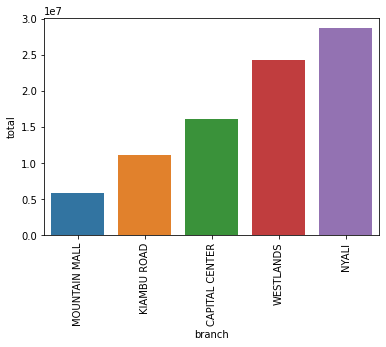

In [22]:
##### branch per total sales of items
y=data[['branch','total']].groupby('branch').sum().sort_values(by='total',ascending='1')
print(y)
y['branch']=y.index
s=sns.barplot(x='branch',y='total',data=y)
for x in s.get_xticklabels():
  x.set_rotation(90)


Nyali had the  highest number of sales of Home care items while mountain mall has the least sales


## 2.) Category analysis



                              total
category                           
LAUNDRY                    22322160
PAPER & PLASTICS           15887140
SURFACE CARE & PROTECTION  15431776
HOUSEHOLD ESSENTIALS       14909414
HOME CLEANING              12553476
AIR CARE & HOME FRAGRANCE   5170892
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


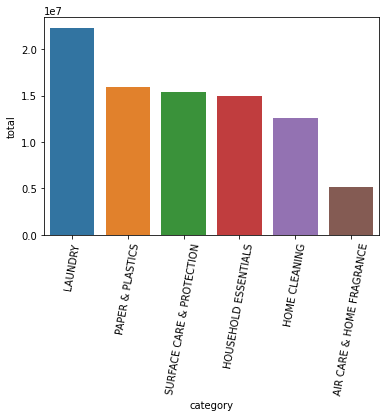

In [23]:
#### total sales per category
cat=data[['category','fineline','item','quantity','total']]
total=cat[['category','total']].groupby('category').sum().sort_values(by='total',ascending=0)
print(total)
total['category']=total.index
chart=sns.barplot(x='category',y='total',data=total)
for x in chart.get_xticklabels():
  x.set_rotation(80)
  print(chart)


                           total
category                        
LAUNDRY                    31142
HOME CLEANING              26456
SURFACE CARE & PROTECTION  23509
PAPER & PLASTICS           23428
HOUSEHOLD ESSENTIALS       18601
AIR CARE & HOME FRAGRANCE   6681


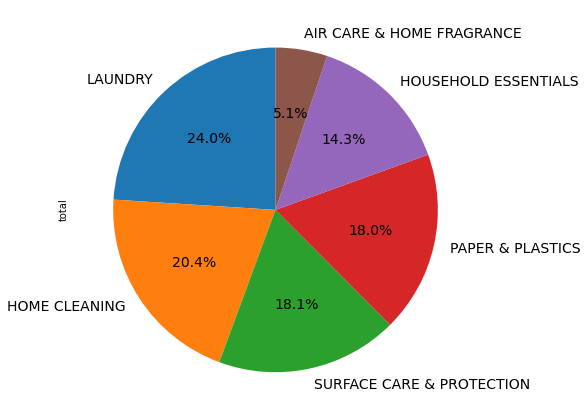

In [24]:
###### number of customers per category
no_customer=cat[['category','total']].groupby('category').count().sort_values(by='total',ascending=0)
print(no_customer)
no_customer['category']=no_customer.index
plt.figure(figsize=(16,8))
ax1 = plt.subplot(121, aspect='equal')
no_customer.plot(kind='pie', y = 'total', ax=ax1,autopct='%1.1f%%',
 startangle=90, shadow=False, legend = False, fontsize=14)

In [25]:
## average number items bought per 
ave=cat.pivot_table(values=['quantity'],index=['category'],aggfunc=np.mean).sort_values(by='quantity',ascending=0)
print(ave)

                           quantity
category                           
PAPER & PLASTICS           5.740652
HOME CLEANING              3.478984
AIR CARE & HOME FRAGRANCE  3.344709
HOUSEHOLD ESSENTIALS       3.222945
LAUNDRY                    3.205767
SURFACE CARE & PROTECTION  2.863414


In homecare Laundry  category is the most performing category, it has the highest number of customers and highest sales. It is interesting to see that 25% of the customers who shop from the category, shop for laundry items.
Surface cleaners which is our focus now is third after home cleaning items. customers purchase 2 to 3 items on average of the items


# Surface cleaners  analysis

In [26]:
### selecting the surface category
surface=data[data['category']=='SURFACE CARE & PROTECTION']
surface

,receipt id,category,fineline,item,brand,quantity,date,customer id,branch,total,day,month
19927,444-03100130665,SURFACE CARE & PROTECTION,DISINFECTANTS,LAVIK DISINF. LAVENDER 1LTR,LAVIK,2,05/02/2019,9612711,KIAMBU ROAD,278,2,May
19928,444-03100129160,SURFACE CARE & PROTECTION,DISINFECTANTS,LAVIK DISINF. LAVENDER 1LTR,LAVIK,2,31/01/2019,9517164,KIAMBU ROAD,278,31,Jan
19929,444-03100131648,SURFACE CARE & PROTECTION,DISINFECTANTS,LAVIK DISINF. LAVENDER 1LTR,LAVIK,2,09/02/2019,9279841,KIAMBU ROAD,278,2,None
19930,444-03100125149,SURFACE CARE & PROTECTION,DISINFECTANTS,LAVIK DISINF. LAVENDER 1LTR,LAVIK,2,14/01/2019,9504473,KIAMBU ROAD,278,14,Jan
19931,444-03100122377,SURFACE CARE & PROTECTION,DISINFECTANTS,LAVIK DISINF. LAVENDER 1LTR,LAVIK,2,03/01/2019,9504473,KIAMBU ROAD,278,1,March
...,...,...,...,...,...,...,...,...,...,...,...,...
107143,211-10100449587,SURFACE CARE & PROTECTION,FLOOR POLISH,FLOKLEEN WAX POLISH 2KG,FLOKLEEN,2,06/05/2019,8092660,NYALI,3184,5,June
107144,599-08100107773,SURFACE CARE & PROTECTION,FLOOR POLISH,FLOKLEEN WAX POLISH 2KG,FLOKLEEN,2,03/06/2019,9656795,CAPITAL CENTER,3184,6,March
110137,211-10100442582,SURFACE CARE & PROTECTION,FLOOR POLISH,FLOSHYNE CLEAR POLISH 1KG,FLOSHYNE,2,09/04/2019,9198061,NYALI,1840,4,None
110138,211-13100155416,SURFACE CARE & PROTECTION,FLOOR POLISH,FLOSHYNE CLEAR POLISH 1KG,FLOSHYNE,2,20/04/2019,9500363,NYALI,1840,20,April


                         total
fineline                      
MULTI-SURFACE CLEANER  5428758
DISINFECTANTS          3238640
GLASS &WINDOW CLEANER  2829952
GLASS & WINDOW POLISH  1129260
FURNITURE POLISH        990640
SURFACE POLISH          471030
KITCHEN CLEANER         425890
FLOOR CLEANER           246438
BATHROOM CLEANER        137412
CARPET CLEANERS         131688
OVEN CLEANER            124066
METAL POLISH            107762
FLOOR POLISH            106026
FURNITURE CLEANER        63752
LENS CLEANER               462


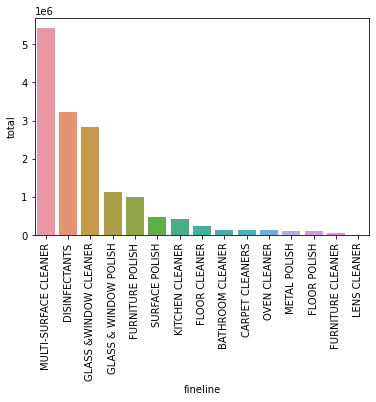

In [27]:
##### the sales by fineline
fine=surface.pivot_table(values=['total'],index=['fineline'],aggfunc=np.sum).sort_values(by='total',ascending=0)
print(fine)
fine['fineline']=fine.index
chart=sns.barplot(x='fineline',y='total',data=fine)
for y in chart.get_xticklabels():
  y.set_rotation(90)

                       quantity
fineline                       
GLASS &WINDOW CLEANER     23922
MULTI-SURFACE CLEANER     19340
DISINFECTANTS              9518
GLASS & WINDOW POLISH      3894
FURNITURE POLISH           3416
SURFACE POLISH             2216
KITCHEN CLEANER            2084
FLOOR CLEANER               886
CARPET CLEANERS             550
BATHROOM CLEANER            536
OVEN CLEANER                334
METAL POLISH                266
FLOOR POLISH                186
FURNITURE CLEANER           166
LENS CLEANER                  2


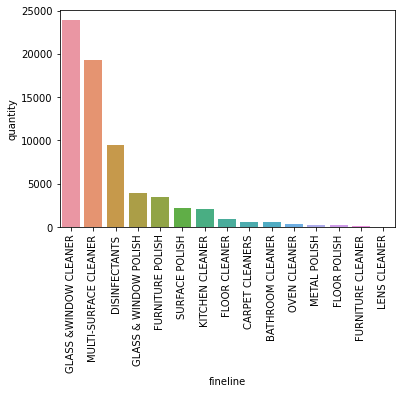

In [28]:
##### the item purchased by fineline
fine=surface.pivot_table(values=['quantity'],index=['fineline'],aggfunc=np.sum).sort_values(by='quantity',ascending=0)
print(fine)
fine['fineline']=fine.index
chart=sns.barplot(x='fineline',y='quantity',data=fine)
for y in chart.get_xticklabels():
  y.set_rotation(90)

                                      total
item                                       
TROPIKAL DELUXE W/POLISH 315ML      1129260
PLEDGE M/SURFACE NATURAL 300ML      1065456
LAVIK DISINF. LAVENDER 5 LTR         992802
TROPIKAL LAVENDER POLISH 315ML       990640
PLEDGE M/SURFACE ORANGE 300M         956676
PLEDGE M/SURFACE LAVENDER 300M       822612
PLEDGE MCS LEMON OIL 275ML           722064
PLEDGE MCS POTPOURI 275ML            706188
SAFISHA G/T/W CLEANER CITRUS 500ML   688212
MAGNEE GLASS CLEANER 750ML           683088
PLEDGE MCS LAVENDER 275ML            664440
SAFISHA G/T/W CLEANER OCEAN 500ML    642348
LAVIK DISINFECTANT  PINE 5 LTR       623968
LAN DISINFECTANT LAVENDER 5LTR       557612
MAGNEE ALL PURPOSE CLEANER 750ML     440670
LAVIK DISINF. LAVENDER 1LTR          407826
TROPIKAL BROWN CANS 225GM            369600
MAGNEE KITCHEN CLEANER 750ML         348170
TOPEX LAVENDER W/CLEANER 300ML       329688
TOPEX LEMON W/CLEANER 300ML          253840


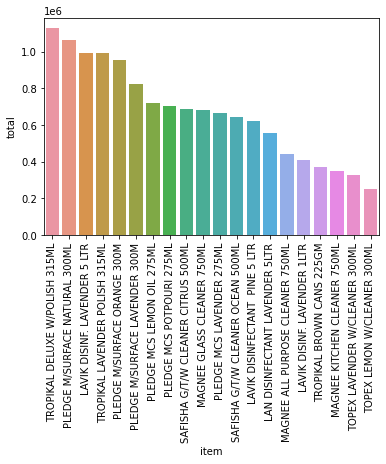

In [29]:
#### sales by items
item=surface.pivot_table(values=['total'],index=['item'],aggfunc=np.sum).sort_values(by='total',ascending=0).head(20)
print(item)
item['item']=item.index
chart=sns.barplot(x='item',y='total',data=item)
for x in chart.get_xticklabels():
  x.set_rotation(90)


                                    quantity
item                                        
SAFISHA G/T/W CLEANER CITRUS 500ML      5462
SAFISHA G/T/W CLEANER OCEAN 500ML       5098
TOPEX LAVENDER W/CLEANER 300ML          4338
MAGNEE GLASS CLEANER 750ML              4066
TROPIKAL DELUXE W/POLISH 315ML          3894
PLEDGE M/SURFACE NATURAL 300ML          3624
TROPIKAL LAVENDER POLISH 315ML          3416
TOPEX LEMON W/CLEANER 300ML             3340
PLEDGE M/SURFACE ORANGE 300M            3254
LAVIK DISINF. LAVENDER 1LTR             2934
PLEDGE M/SURFACE LAVENDER 300M          2798
PLEDGE MCS LEMON OIL 275ML              2456
PLEDGE MCS POTPOURI 275ML               2402
MAGNEE ALL PURPOSE CLEANER 750ML        2382
PLEDGE MCS LAVENDER 275ML               2260
LAVIK DISINF. LAVENDER 5 LTR            2022
MAGNEE KITCHEN CLEANER 750ML            1882
TROPIKAL BROWN CANS 225GM               1760
LAN DISINFECTANT LAVENDER 5LTR          1276
LAVIK DISINFECTANT  PINE 5 LTR          1258


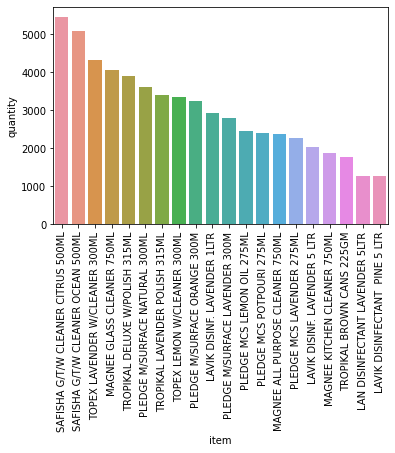

In [30]:
### number of items purchased
item=surface.pivot_table(values=['quantity'],index=['item'],aggfunc=np.sum).sort_values(by='quantity',ascending=0).head(20)
print(item)
item['item']=item.index
chart=sns.barplot(x='item',y='quantity',data=item)
for x in chart.get_xticklabels():
  x.set_rotation(90)


Safisha  cleaner citrus was the most purchased surface cleaning product, since it cheaper than Tropical dulexe polish, it do not contribute as much in sales..

         total
month         
March  2228556
May    2102948
April  2077796
Jan    2005424
June   1896058
Feb    1843492


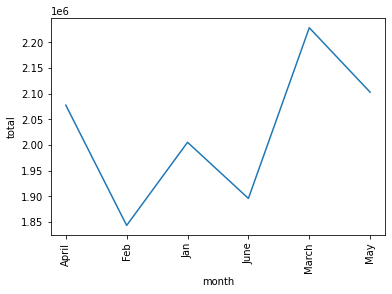

In [31]:
#### sales  per month
prom=surface.pivot_table(values=['total'],index=['month'],aggfunc=np.sum).sort_values(by='total',ascending=0)
print(prom)
prom['month']=prom.index
chart=sns.lineplot(x='month',y='total',data=prom)
for x in chart.get_xticklabels():
  x.set_rotation(90)

       customer id
month             
March         3415
April         3246
May           3054
Jan           3047
June          3047
Feb           2908


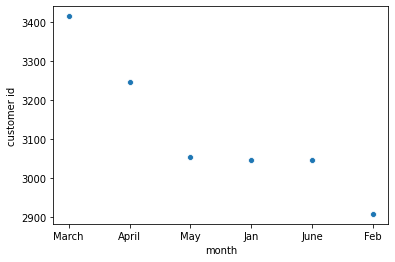

In [32]:
##number of customers per month
no=surface.pivot_table(values=['customer id'],index=['month'],aggfunc='count').sort_values(by='customer id',ascending=0)
print(no)
no['month']=no.index
chart=sns.scatterplot(x='month',y='customer id',data=no,)

     customer id
day             
1           1731
2           1834
3           1973
4           1790
5           1830
6           1561
13           678
14           674
15           683
16           660
17           742
18           666
19           622
20           643
21           557
22           647
23           626
24           677
25           774
26           705
27           808
28           808
29           669
30           716
31           435


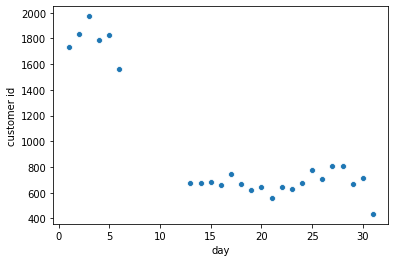

In [33]:
##### number of customer per day
day=surface.pivot_table(values=['customer id'],index=['day'],aggfunc='count').sort_values(by='day',ascending=1)
print (day)
day['day']=day.index
chart=sns.scatterplot(x='day',y='customer id',data=day)

For the the 6 months March and  April were the Months when surface cleaners products were purchased.. We also observed regardless of the month, customers purchase the products  during the beginning  of the month.

# **MARKET BASKET ANALYSIS**

Using the Apriori algothm,we will mine the relationship of  products, so that we can know which products are purchased together

Let's now create a list of the unique transactions so that we can transform our data into the correct format using TransactionEncoder.

In [38]:

####For loop to create a list of the unique transactions throughout the dataset:
transaction_list = []
for i in data['receipt id'].unique():
    tlist = list(set(data[data['receipt id']==i]['item']))
    if len(tlist)>0:
        transaction_list.append(tlist)
print(len(transaction_list))

16831


In [39]:
### first we transform our data into transactional dataset
x=TransactionEncoder()
y=x.fit(transaction_list).transform(transaction_list)
df=pd.DataFrame(y,columns=x.columns_)
df

,DOOM P/GUARD LEMON 600ML B2GI,ADIX BUCKET 17LTR PRINTED,ADIX BUCKET WITH LID 20LT B017,ADIX DEEP BASIN 18LTR B021,ADIX MAXI BASIN B014,ADIX WASTE PAPER BASKET,ADIX WASTEPAPER BASKET WP-002,AIRMAX DEODORIZER CITRUS 50G,AIRMAX DEODORIZER LAVENDER 50G,AIRMAX DEODORIZER ORANGE 50G,AIRMAX DEODORIZER ROSE 50G,AIRMAX DEODORIZER S/BERRY 50G,AIRWICK AQUAM W/LAV & MBRE 345,AIRWICK AQUAMIST F/JASMIN 345M,AIRWICK AQUAMIST M/C BLOS 345M,AIRWICK AQUAMIST M/MIST 345M,AIRWICK F/M CITRUS 2*250M REFI,AIRWICK F/M CITRUS+GADGET PROM,AIRWICK F/M LAVEN 2*250M REFIL,AIRWICK F/M LAVEN+GADGET PROM,AIRWICK F/M ROSE+GADGET PROMO,AIRWICK F/MATIC AQUAMAR250M RE,AIRWICK F/MATIC CITRUS 250M RE,AIRWICK F/MATIC FRUITCOCKTAIL 250M REF,AIRWICK F/MATIC LAVEN 250M REF,AIRWICK F/MATIC M&CHER 250M RE,AIRWICK F/MATIC ROSE 250M REFI,AIRWICK F/MATIC W/FLOW 250M RE,AIRWICK LAVENDER 300ML,AIRWICK POT POURI 300ML,AIRWICK ROSE 300ML,AQUAMIST TWIN PACK 345ML,ARIEL DETERGENT 1KG,ARIEL DETERGENT 200GM,ARIEL DETERGENT 500GM,ARIEL MACHINE POWDER 1.5KG,ARIEL MACHINE POWDER 2KG,ARIEL MACHINE POWDER 3KG,ARIEL MACHINE POWDER 750G,ARIEL MICRO-CLEANING 3.5KG,...,VELVEX PINK FACIAL TISSUE 80'S,VELVEX PINK POCKET TISSUES 10'S,VELVEX PREM.LAMINATED K/TOWEL,VELVEX PREMIUM KIT-TOWEL 2PCK,VELVEX PREMIUM PLAIN 140'S BLCK,VELVEX PREMIUM PLAIN 140'S SILVER,VELVEX PREMIUM PLAIN 80'S BLCK,VELVEX PREMIUM PLAIN 80'S SILVER,VELVEX RED DESIGNER SERVIETTES 100'S,VELVEX STD FACIAL TISSUES 80S,VELVEX T/PAPER 8 S WHITE,VELVEX T/PAPER TWIN PACK,VELVEX WHITE POCKET TISSUES 10'S,VELVEX WHITE T/PAPER,VELVEX WHITE T/PAPER 10S,VIKRUT WOODEN CANDLE HOLD #26,VIM BLEACH POWDER 1KG,VIM BLEACH POWDER 500GM,VIM POWDER LAVENDER FRESH 1KG,VIM POWDER LAVENDER FRESH 500G,WD-40 100ML,WD-40 400ML,WD-40 SILICON FREE 200ML,WELS SUFURIA SHINER 1PK GIANT,WELS SUFURIA SHINER 1PK LARGE,WHITE STAR BAR SOAP 1KG,WHITE STAR BAR SOAP 800GM,WHITE STAR WRAPPED 500GM,WHITE WASH EX/M/PURPOSE SOAP 200G,WHITE WASH NATURAL 800G,WHITE WASH TAB 200GM,WHITE WASH WHITE SOAP 1KG,WHITE WASH WHITE SOAP 800G,WIPEX SPONGE/C REG 1PK 251,WIPEX SPONGE/C REG.3PK 255,WOOL WEB COB LARGE,ZEBRA MATCH BOX 10'S,ZENTA SOAP CREAM 1KG,ZENTA SOAP CREAM 700G,ZENTA SOAP WHITE 700G
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

Now let's apply apriori. I will use the min_threshold parameter in the association rules for the lift metric to be 1.0 because if it is less than one, then the two items are not likely to be bought together . We will sort the values by confidence to see the likelihood that an item is bought if its antecedent is bought.

In [42]:
#### first lets see the frequently purchased items

freq = apriori(df, min_support=0.01, use_colnames=True)
freq

,support,itemsets
0,0.040877,(ARIEL DETERGENT 1KG)
1,0.010279,(ARIEL DETERGENT 500GM)
2,0.022815,(ARIEL MICRO-CLEANING 3.5KG)
3,0.043313,(ARIEL TOUCH OF DOWNY 1KG)
4,0.010338,(ARIEL TOUCH OF DOWNY 500G)
...,...,...
166,0.014200,(ZEBRA MATCH BOX 10'S)
167,0.011408,"(HARPIC POWER PLUS ORIG 500ML, HARPIC CITRUS P..."
168,0.014319,"(SAFISHA G/T/W CLEANER CITRUS 500ML, SAFISHA G..."
169,0.010932,"(SAFISHA G/T/W CLEANER CITRUS 500ML, VELVEX P/..."


In [46]:
#### including the number  of the items purchased per transaction
freq['number of items']=freq['itemsets'].apply(lambda x:len(x))
freq.sort_values(by='number of items',ascending=0).head()

,support,itemsets,number of items
170,0.014378,"(VELVEX WHITE T/PAPER 10S, VELVEX P/SERVIETTES...",2
169,0.010932,"(SAFISHA G/T/W CLEANER CITRUS 500ML, VELVEX P/...",2
168,0.014319,"(SAFISHA G/T/W CLEANER CITRUS 500ML, SAFISHA G...",2
167,0.011408,"(HARPIC POWER PLUS ORIG 500ML, HARPIC CITRUS P...",2
117,0.014794,(SCOTCH BRITE H/DUTY S/PAD 4PK),1
109,0.022756,(RHINO NDOGO MATCH BOX - 10 S),1
110,0.010338,(SAFISHA ALL PURPOSE CLEANER 4),1
111,0.010397,(SAFISHA DISNF PINE 1L),1
112,0.122096,(SAFISHA G/T/W CLEANER CITRUS 500ML),1
113,0.111699,(SAFISHA G/T/W CLEANER OCEAN 500ML),1


In [47]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)
rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(HARPIC POWER PLUS ORIG 500ML),(HARPIC CITRUS POWER PLUS 500ML),0.047591,0.048898,0.011408,0.239700,4.902062,0.009080,1.250957
1,(HARPIC CITRUS POWER PLUS 500ML),(HARPIC POWER PLUS ORIG 500ML),0.048898,0.047591,0.011408,0.233293,4.902062,0.009080,1.242207
4,(VELVEX WHITE T/PAPER 10S),(VELVEX P/SERVIETTES WHITE 100'S),0.067673,0.093756,0.014378,0.212467,2.266181,0.008034,1.150738
5,(VELVEX P/SERVIETTES WHITE 100'S),(VELVEX WHITE T/PAPER 10S),0.093756,0.067673,0.014378,0.153359,2.266181,0.008034,1.101207
3,(SAFISHA G/T/W CLEANER OCEAN 500ML),(SAFISHA G/T/W CLEANER CITRUS 500ML),0.111699,0.122096,0.014319,0.128191,1.049923,0.000681,1.006992
2,(SAFISHA G/T/W CLEANER CITRUS 500ML),(SAFISHA G/T/W CLEANER OCEAN 500ML),0.122096,0.111699,0.014319,0.117275,1.049923,0.000681,1.006317


From the mining process we can see a velvex white t/paper and velvex p/serviettes 10s are mostly likly to be bought together.
the rest of the items were bunded promotions or the customers bought two items everytime they purchased